# Deepfake Detection by Observing Glitches

In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import dlib

Load the dataset.

In [2]:
DATASET_DIR = '../input/deepfake-detection-challenge/'
TRAIN_SAMPLE_DIR = 'train_sample_videos'
TEST_DIR = 'test_videos'

def get_metadata(path):
    df = pd.read_json(os.path.join(DATASET_DIR, path, 'metadata.json'))
    return df.T

metadata_frame = get_metadata(TRAIN_SAMPLE_DIR)
metadata_frame.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


Let's take a look at some videos.

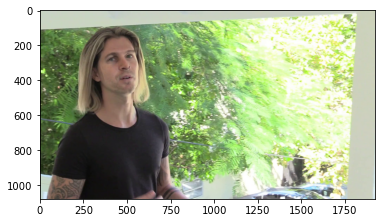

In [3]:
def get_frame_from_video(video_name, dataset_dir=TRAIN_SAMPLE_DIR):
    img = cv.VideoCapture(os.path.join(DATASET_DIR, TRAIN_SAMPLE_DIR, video_name))
    ret, frame = img.read()
    return cv.cvtColor(frame, cv.COLOR_BGR2RGB)

frame = get_frame_from_video('aagfhgtpmv.mp4')
plt.imshow(frame)

Now, detect faces from the last video.

In [4]:
!curl -L 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2' -o 'face_landmark_dataset.dat.bz2'
!bzip2 -d 'face_landmark_dataset.dat.bz2'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 61.0M  100 61.0M    0     0  2759k      0  0:00:22  0:00:22 --:--:-- 2363k 0      0 --:--:-- --:--:-- --:--:--     0     0  2930k      0  0:00:21  0:00:11  0:00:10 3157k 2892k      0  0:00:21  0:00:17  0:00:04 2730k
bzip2: Output file face_landmark_dataset.dat already exists.


In [5]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('./face_landmark_dataset.dat')
frame_bgr = cv.cvtColor(frame, cv.COLOR_RGB2BGR)
rects = detector(frame_bgr, 1)
rects

rectangles[[(365, 217) (588, 440)]]

Visualize the detected rectangle.

(1080, 1920, 3)


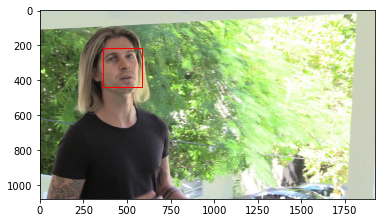

In [6]:
plt.imshow(frame)
print(frame.shape)
ax = plt.gca()
for rect in rects:
    ax.add_patch(patch.Rectangle((rect.left(), rect.top()), rect.width(), rect.height(), edgecolor='r', facecolor='none'))

Extract faces.

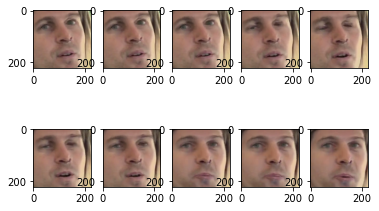

In [7]:
cap = cv.VideoCapture(os.path.join(DATASET_DIR, TRAIN_SAMPLE_DIR, 'aagfhgtpmv.mp4'))
for frame_num in range(10):
    ax = plt.subplot(2, 5, frame_num + 1)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_num)
    ret, current_frame = cap.read()
    rects = detector(current_frame, 1)
    ax.imshow(cv.cvtColor(current_frame[rect.top():rect.bottom(),rect.left():rect.right()], cv.COLOR_BGR2RGB))
plt.show()